## This script contains the following:
1. Importing Libraries
2. Import Data
3. Tokenization 
4. Stopwords
5. Creating a tags list using TextBlob
6. Top POS Labels
7. Counting Countries Mentions in the Text

## 1. Importing Libraries:

In [112]:
# Importing libraries
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import nltk
import re
from collections import Counter
sns.set()
import os
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

## 2. Importing Data:

In [4]:
file_path = r"C:\Users\hp\20th-century\Data\20th Century Events 1.4.txt"
myfile = open(file_path, encoding='utf-8') 


In [6]:
with open(file_path, 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

## 3. Tokenization:

### 3.1  Tokenization of the words from the text

The process of turning a full article into a series of words or individual components for analysis.

In [21]:
# Use NLTK to tokenize the txt file
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)

In [27]:
# Create frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4793 samples and 20894 outcomes>


In [31]:
# Display the most common 10 tokens
dist_words.most_common(10)

[('.', 1265),
 ('the', 1095),
 (',', 958),
 ('of', 606),
 ('and', 398),
 ('to', 324),
 ('[', 300),
 (']', 300),
 ('The', 296),
 ('in', 290)]

### 3.2 Creating a bar chart to plot the 10 most common words:

In [33]:
# Create a dataframe from the list
df_base_dist = pd.DataFrame(dist_words.most_common(10))
df_base_dist.columns = ['Words', "Frequency"]

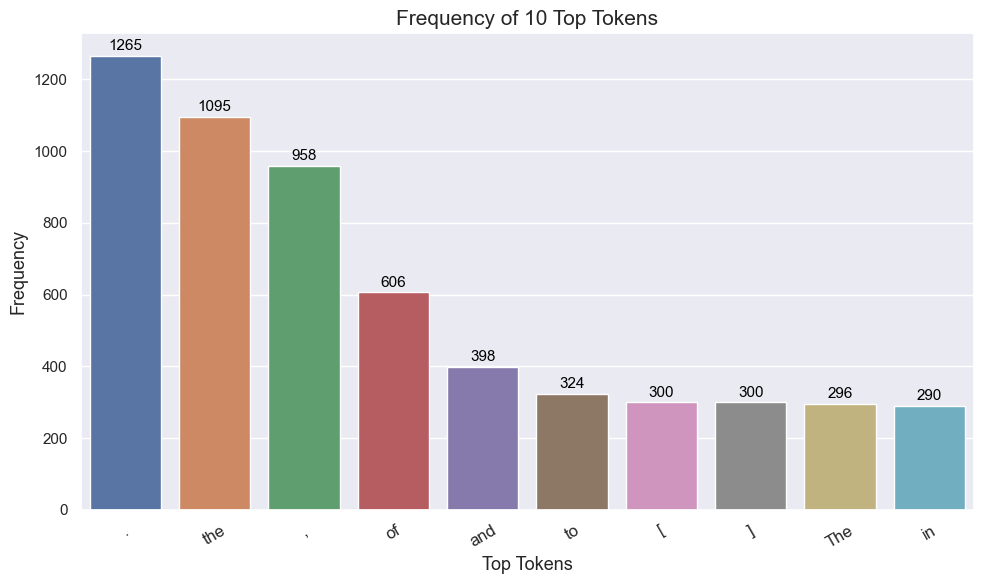

In [47]:
# Frequency Distribution Bar Plot

# Create the figure
base_dist_fig = plt.figure(figsize=(10, 6))

# Generate the bar plot
fig1 = sns.barplot(data=df_base_dist, x='Words', y='Frequency')

# Formatting for title and axes
plt.title('Frequency of 10 Top Tokens', fontsize=15)
plt.xticks(rotation=30, fontsize=12)  # Ensures better readability for x-axis labels
plt.xlabel('Top Tokens', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

# Add labels to the bars
for container in fig1.containers:
    fig1.bar_label(container, fontsize=11, padding=2, color='black')  

# Show the plot
plt.tight_layout()  
plt.savefig(r'C:\Users\hp\20th-century\Visualizations/frequency_distribution_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Stopwords:

In [54]:
# Import the stopwords module and create a set
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [56]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [60]:
# Substitute all punctuations marks with a space 
sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [64]:
# Word tokenization
tokenized_word_2 = word_tokenize(sans_punc)

In [66]:
# Create a new FreqDist
dist_words_filter_2 = FreqDist(tokenized_word_2)

In [68]:
df_filtered_dist = pd.Series(dist_words_filter_2).to_frame().reset_index()
df_filtered_dist.columns = ['Words', 'Frequency']
df_filtered_dist = df_filtered_dist.sort_values(by = ['Frequency'], ascending = False)

# Check the output
df_filtered_dist.head(10)

,Words,Frequency
39,The,316
1194,December,220
2851,Retrieved,203
43,War,127
162,s,98
40,war,91
2,th,86
37,World,77
435,Soviet,61
612,Hitler,50


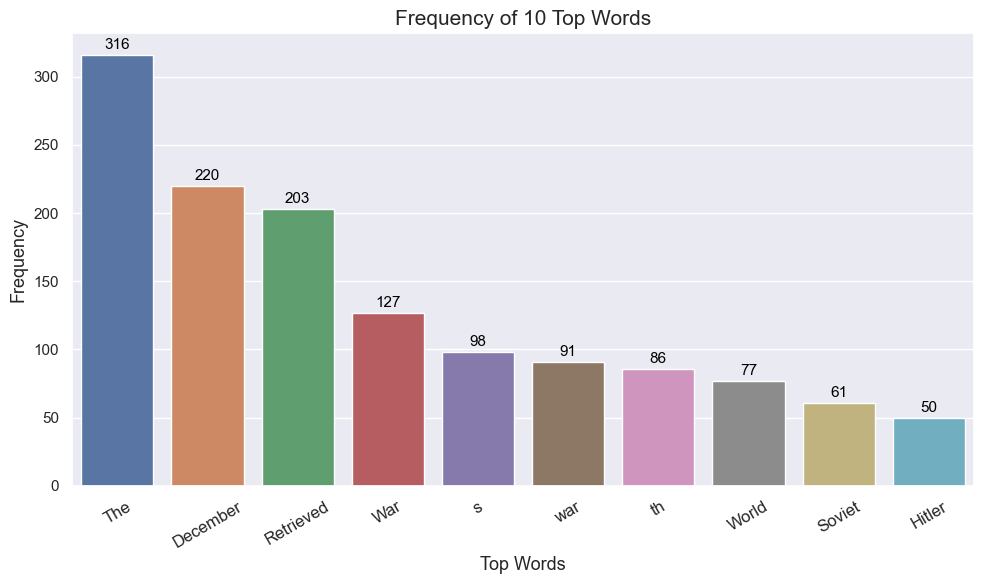

In [70]:
# Frequency Distribution Bar Plot

# Create the figure
filtered_fig = plt.figure(figsize = (10,6))

# Generate the bar plot
fig2 = sns.barplot(data = df_filtered_dist.head(10), x = 'Words', y = 'Frequency')

# Formatting for title and axes
plt.title('Frequency of 10 Top Words', fontsize=15)
plt.xticks(rotation=30, fontsize=12) 
plt.xlabel('Top Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

# Add labels to the bars
for container in fig2.containers:
    fig2.bar_label(container, fontsize=11, padding=2, color='black')  

# Show the plot
plt.tight_layout()  
plt.savefig(r'C:\Users\hp\20th-century\Visualizations/frequency_distribution_words.png', dpi=300, bbox_inches='tight')
plt.show()

In [72]:
# Define new stop words
new_stopwords = ['And', 'Then', 'n', 't', 's', 'S', 'The', 'th', 'ISBN', 'www']

In [84]:
# Remove stopwords from set
filtered_words_3 = [] # Creates an empty list
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered_words_3.append(word)

In [94]:
# Substitute all punctuations marks with a space 
sans_punc_2 = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",   # Replace all non-letters with spaces
                          str(filtered_words_3))

In [96]:
# Word tokenization
tokenized_words_4 = word_tokenize(sans_punc_2)

In [102]:
# Create a new FreqDist
tokenized_filtered_dist_3 = FreqDist(tokenized_words_4)
df_filtered_dist_2 = pd.Series(tokenized_filtered_dist_3).to_frame().reset_index()
df_filtered_dist_2.columns = ['Words', 'Frequency']
df_filtered_dist_2 = df_filtered_dist_2.sort_values(by = ['Frequency'], ascending = False)

# Check the output
df_filtered_dist_2.head(10)

,Words,Frequency
1191,December,220
2844,Retrieved,203
41,War,127
38,war,91
36,World,77
432,Soviet,61
609,Hitler,50
244,Germany,42
1872,History,41
292,first,38


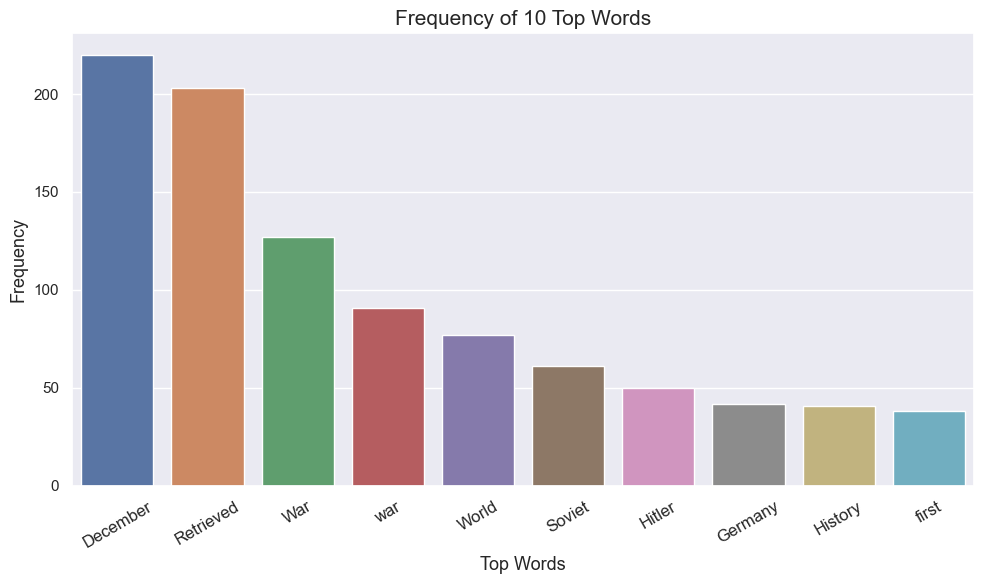

In [88]:
# Frequency Distribution Bar Plot

# Create the figure
filtered_fig_2 = plt.figure(figsize = (10,6))

# Generate the bar plot
fig3 = sns.barplot(data = df_filtered_dist_2.head(10), x = 'Words', y = 'Frequency')

# Formatting for title and axes
plt.title('Frequency of 10 Top Words', fontsize=15)
plt.xticks(rotation=30, fontsize=12) 
plt.xlabel('Top Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

# Add labels to the bars
for container in fig3.containers:
    fig2.bar_label(container, fontsize=11, padding=2, color='black')  

# Show the plot
plt.tight_layout()  
plt.savefig(r'C:\Users\hp\20th-century\Visualizations/frequency_distribution_filtred.png', dpi=300, bbox_inches='tight')
plt.show()

#### Observations: 

1. Impact of Stop Word Removal:
After the removal of stop words, we see a more meaningful distribution of key content-related words, such as "December," "Retrieved," and "War," etc.  The plot suggests that terms related to specific historical events are central to the text, which makes sense given the article’s focus on key events in the 20th century.

2. Insights into the Text:
The frequency of certain words, such as "War," "Soviet," "Hitler," and "History," provides a clue about the text's content, this indicates that the article likely covers key historical periods involving significant wars and geopolitical tensions in 20th-century events.

3. The separation of 'War' and 'war,' as well as 'World' and 'world,' highlights the importance of distinguishing proper nouns (such as the World Wars) from common nouns. 

## 5. Creating a tags list using TextBlob

In [106]:
%%time 

# Create a TextBlob object from the filtered words list
text = TextBlob(str(tokenized_words_4))

CPU times: total: 0 ns
Wall time: 14.8 ms


In [114]:
# Assign tags to each word
tags_list = text.tags

In [116]:
# Create a dataframe from the list
df_text_tagged = pd.DataFrame(tags_list)
df_text_tagged.columns = ['Words', "Word type"]
# Check the output
df_text_tagged.head(10)

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS
5,'century,NNP
6,',POS
7,'WikipediaJump,NNP
8,',POS
9,'menumove,NNP


In [118]:
# Group the words by their tag and count how many words were assigned to each tag
df_POS_tags = df_text_tagged.groupby('Word type').count().reset_index().sort_values(by = ['Words'], ascending = False)
df_top_POS_tags = df_POS_tags.head(10).reset_index().drop(['index'], axis = 1)

# Check the output
df_top_POS_tags

,Word type,Words
0,POS,6732
1,NNP,5453
2,NNS,1026
3,VBD,845
4,NN,375
5,VBG,319
6,JJ,284
7,IN,154
8,RB,141
9,CD,75


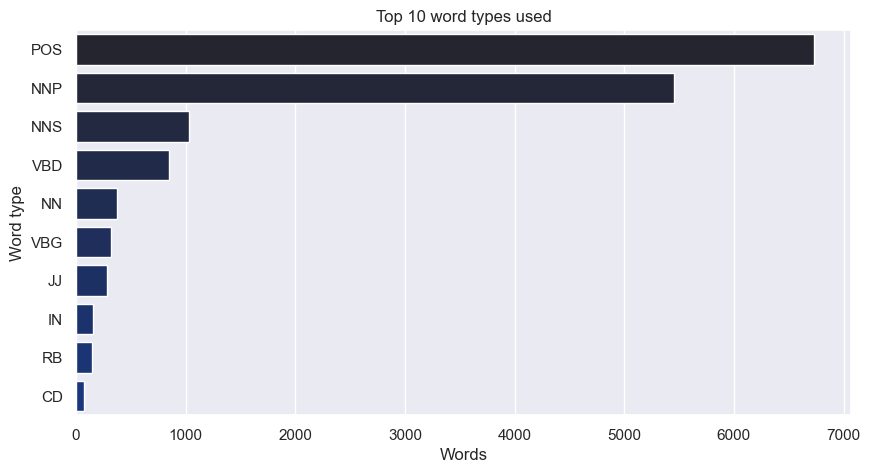

In [124]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type", saturation = 0.9, data = df_top_POS_tags).set_title("Top 10 word types used")
    plt.savefig(r'C:\Users\hp\20th-century\Visualizations/top10types.png', dpi=300, bbox_inches='tight')

## 6.Top POS labels:

Creating three bar plots with the top POS labels—one each for nouns, verbs, and adjectives:

In [128]:
# Create lists of POS labels for nouns, verbs, and adjectives
nounPOS = ['NN', 'NNS', 'NNP', 'NNPS']
verbPOS = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
adjectivePOS = ['JJ', 'JJR', 'JJS']

In [130]:
# Subset dataframe to isolate words tagged as nouns, verbs, and adjectives
df_nouns = df_text_tagged.loc[df_text_tagged['Word type'].isin(nounPOS)]
df_verbs = df_text_tagged.loc[df_text_tagged['Word type'].isin(verbPOS)]
df_adjectives = df_text_tagged.loc[df_text_tagged['Word type'].isin(adjectivePOS)]

In [132]:
# Group by the words in each dataframe, and count to see which words are most frequent in each grammar category
df_noun_freq = df_nouns.groupby('Words').count().reset_index().sort_values(by = ['Word type'], ascending = False)
df_verb_freq = df_verbs.groupby('Words').count().reset_index().sort_values(by = ['Word type'], ascending = False)
df_adjective_freq = df_adjectives.groupby('Words').count().reset_index().sort_values(by = ['Word type'], ascending = False)

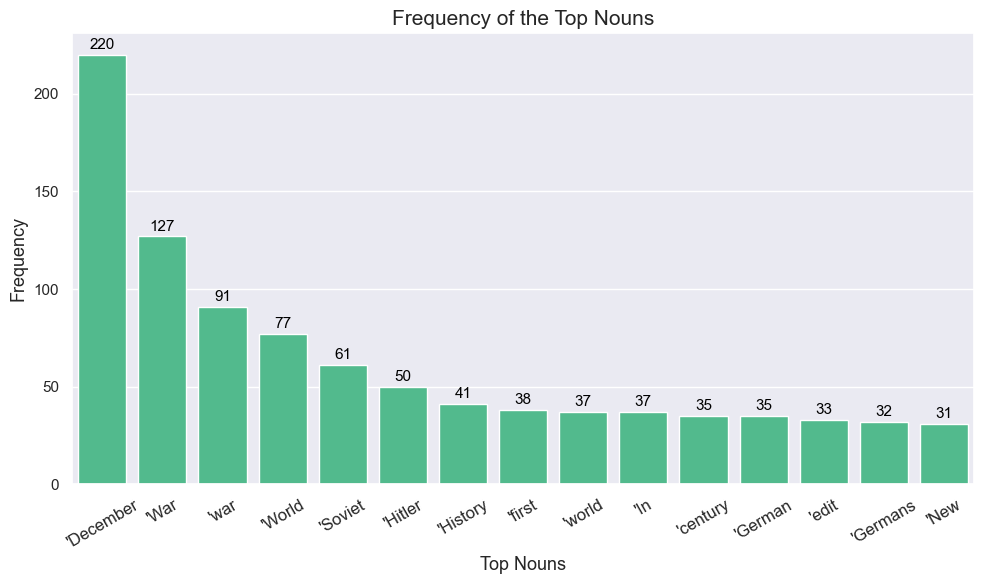

In [134]:
# Frequency Distribution Bar Plot: NOUNS
noun_fig = plt.figure(figsize = (10, 6))
# Generate the bar plot
fig5 = sns.barplot(data = df_noun_freq.head(15), x = 'Words', y = 'Word type', color = '#41cb8f')

# Formatting for title and axes
plt.title('Frequency of the Top Nouns', fontsize = 15)
plt.xticks(rotation = 30, fontsize=12)
plt.xlabel('Top Nouns', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

# Add labels to the bars
for container in fig5.containers:
    fig5.bar_label(container, fontsize = 11, padding =2, color = 'black')

# Show the plot
plt.tight_layout()  
plt.savefig(r'C:\Users\hp\20th-century\Visualizations/Nouns.png', dpi=300, bbox_inches='tight')
plt.show()

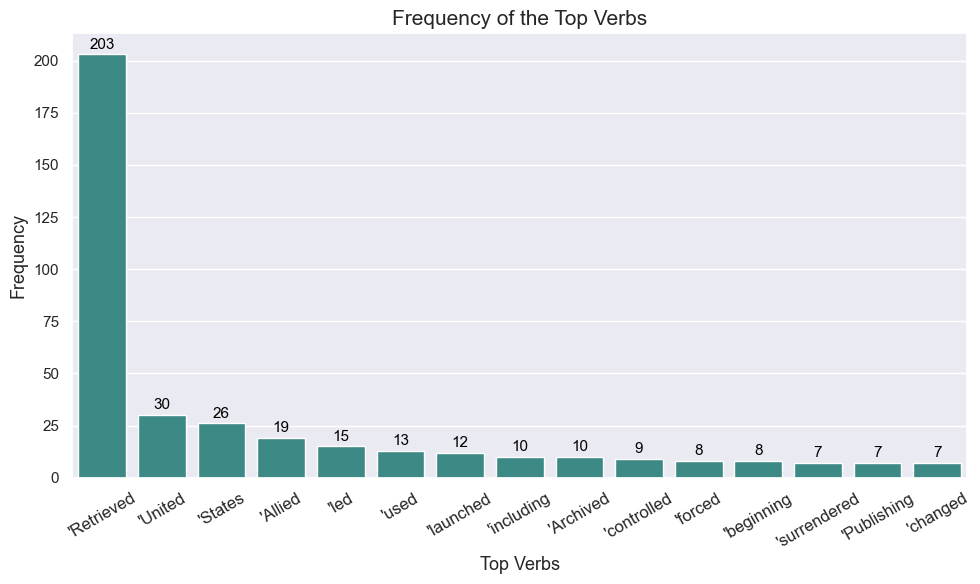

In [136]:
# Frequency Distribution Bar Plot: VERBS
verb_fig = plt.figure(figsize = (10, 6))
# Generate the bar plot
fig6 = sns.barplot(data = df_verb_freq.head(15), x = 'Words', y = 'Word type', color = '#309691')

# Formatting for title and axes
plt.title('Frequency of the Top Verbs', fontsize = 15)
plt.xticks(rotation = 30, fontsize=12)
plt.xlabel('Top Verbs', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

# Add labels to the bars
for container in fig6.containers:
    fig6.bar_label(container, fontsize = 11, padding =2, color = 'black')

# Show the plot
plt.tight_layout()  
plt.savefig(r'C:\Users\hp\20th-century\Visualizations/Verbs.png', dpi=300, bbox_inches='tight')
plt.show()

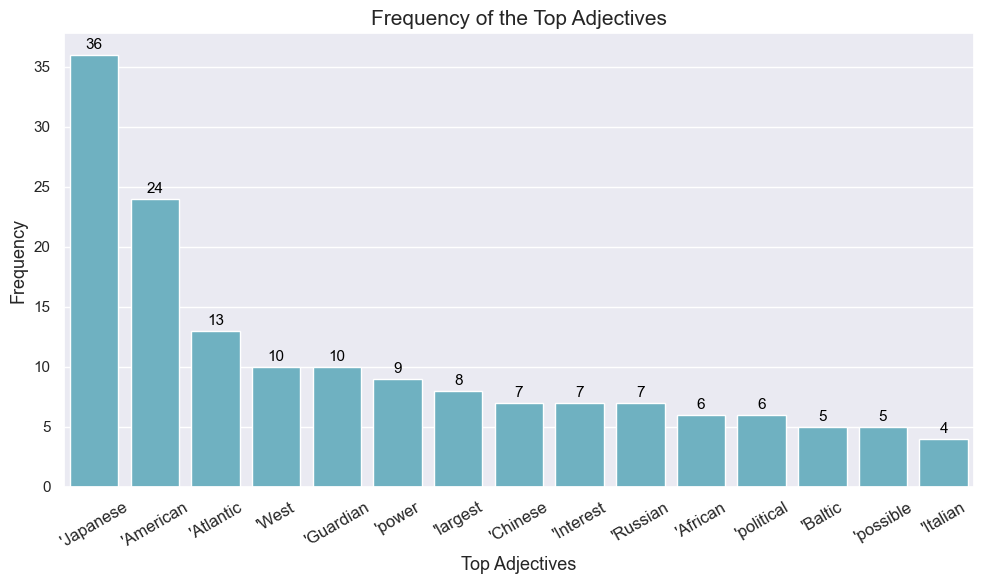

In [138]:
# Frequency Distribution Bar Plot: ADJECTIVES
adjective_fig = plt.figure(figsize = (10, 6))
# Generate the bar plot
fig7 = sns.barplot(data = df_adjective_freq.head(15), x = 'Words', y = 'Word type', color = '#61bacf')

# Formatting for title and axes
plt.title('Frequency of the Top Adjectives', fontsize = 15)
plt.xticks(rotation = 30, fontsize=12)
plt.xlabel('Top Adjectives', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

# Add labels to the bars
for container in fig7.containers:
    fig7.bar_label(container, fontsize = 11, padding =2, color = 'black')

# Show the plot
plt.tight_layout()  
plt.savefig(r'C:\Users\hp\20th-century\Visualizations/Adjs.png', dpi=300, bbox_inches='tight')
plt.show()

#### Observations: 

1. We can see that TextBlob's labeling is not completely precise. For example, in the noun chart, words such as 'first,' 'in,' and 'edit' are mistakenly categorized as nouns, despite not fitting that category. Similarly, in the verb chart, words like 'United,' and 'States,' are tagged as verbs, but they should be recognized as proper nouns within the context of this article. In the adjective chart, many of the top words are demonyms referring to specific countries, and 'Interest' appears to be misclassified, as it is probably used as a noun in this context.
2. individual nouns occur much more frequently than verbs or adjectives. In the verb category, 'Retrieved' stands out as a major outlier. 

## 7.Counting Countries Mentions in the Text

In [143]:
# Join each element in the list into a single string separated by a space
listToStr = ' '.join([str(elem) for elem in tokenized_words_4])

In [145]:
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [149]:
# Import the list of countries as a dataframe
path2 = r'C:\Users\hp\20th-century\Data'
countries = pd.read_csv(os.path.join(path2, 'countries_list_20th_century_1.5.csv'), index_col = 0)

In [153]:
countries.shape

(209, 1)

In [155]:
countries.head()

,country_name
Column1,
1.0,Afghanistan
2.0,Albania
3.0,Algeria
4.0,Andorra
5.0,Angola


In [157]:
# Replace names with aliases
countries['country_name'] = countries['country_name'].replace("  Antigua and Barbuda ", "Barbuda")
countries['country_name'] = countries['country_name'].replace(" Bahamas, The ", "Bahamas")
countries['country_name'] = countries['country_name'].replace("  Bosnia and Herzegovina ", "Bosnia")
countries['country_name'] = countries['country_name'].replace("  Burkina Faso ", "Faso")
countries['country_name'] = countries['country_name'].replace("  Cape Verde ", "Verde")
countries['country_name'] = countries['country_name'].replace("  Costa Rica ", "Rica")
countries['country_name'] = countries['country_name'].replace("  China, People's Republic of ", "China")
countries['country_name'] = countries['country_name'].replace("   Cook Islands ", "Cook")
countries['country_name'] = countries['country_name'].replace("   Micronesia, Federated States of ", "Micronesia")
countries['country_name'] = countries['country_name'].replace("   New Zealand ", "Zealand")
countries['country_name'] = countries['country_name'].replace("   North Macedonia ", "Macedonia")
countries['country_name'] = countries['country_name'].replace("   Papua New Guinea ", "Papua")
countries['country_name'] = countries['country_name'].replace("  East Timor ", "Timor")
countries['country_name'] = countries['country_name'].replace("   El Salvador ", "Salvador")
countries['country_name'] = countries['country_name'].replace("   Gambia, The ", "Gambia")
countries['country_name'] = countries['country_name'].replace("  Saint Kitts and Nevis ", "Kitts")
countries['country_name'] = countries['country_name'].replace("   Saint Lucia ", "Lucia")
countries['country_name'] = countries['country_name'].replace("   Saint Vincent and the Grenadines ", "Grenadines")
countries['country_name'] = countries['country_name'].replace("   San Marino ", "Marino")
countries['country_name'] = countries['country_name'].replace("   São Tomé and Príncipe ", "Príncipe")
countries['country_name'] = countries['country_name'].replace("   Saudi Arabia ", "Saudi")
countries['country_name'] = countries['country_name'].replace("   Sierra Leone ", "Leone")
countries['country_name'] = countries['country_name'].replace("   São Tomé and Príncipe ", "Príncipe")
countries['country_name'] = countries['country_name'].replace("   Solomon Islands ", "Solomon")
countries['country_name'] = countries['country_name'].replace("   Sri Lanka ", "Lanka")
countries['country_name'] = countries['country_name'].replace("   Trinidad and Tobago ", "Trinidad")
countries['country_name'] = countries['country_name'].replace("   United Arab Emirates ", "Emirates")
countries['country_name'] = countries['country_name'].replace("   United Kingdom ", "Kingdom")
countries['country_name'] = countries['country_name'].replace("   United States ", "States")
countries['country_name'] = countries['country_name'].replace("    Vatican City (Holy See) ", "Vatican")


In [180]:
countries['country_name'] = countries['country_name'].astype(str).apply(lambda x: x.rsplit(' ', 1)[-1])

In [182]:
# Convert the 'country_name' column into a list
country_list = countries['country_name'].to_list()

In [186]:
# count from 'all_counts'
dict_of_counts = {d : all_counts[d] for d in cleaned_country_list}

In [188]:
# Invert the dictionary and make it into a dataframe
dct = {v:[k] for v,k in dict_of_counts.items()}  
df_country_mentions = pd.DataFrame(dct)

In [190]:
# Transpose the dataframe
df_country_mentions = df_country_mentions.transpose().reset_index()

In [192]:
# Rename the columns 
df_country_mentions.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [194]:
# Sort the dataframe by putting the most frequently mentioned countries at the top
df_country_mentions = df_country_mentions.sort_values('Times mentioned', axis = 0, ascending = False)
# Check the output
df_country_mentions.head(10)

,Country,Times mentioned
64,Germany,42
60,France,16
35,China,10
76,India,9
9,Austria,5
69,Guinea,4
59,Finland,4
66,Greece,4
78,Iran,4
74,Hungary,3


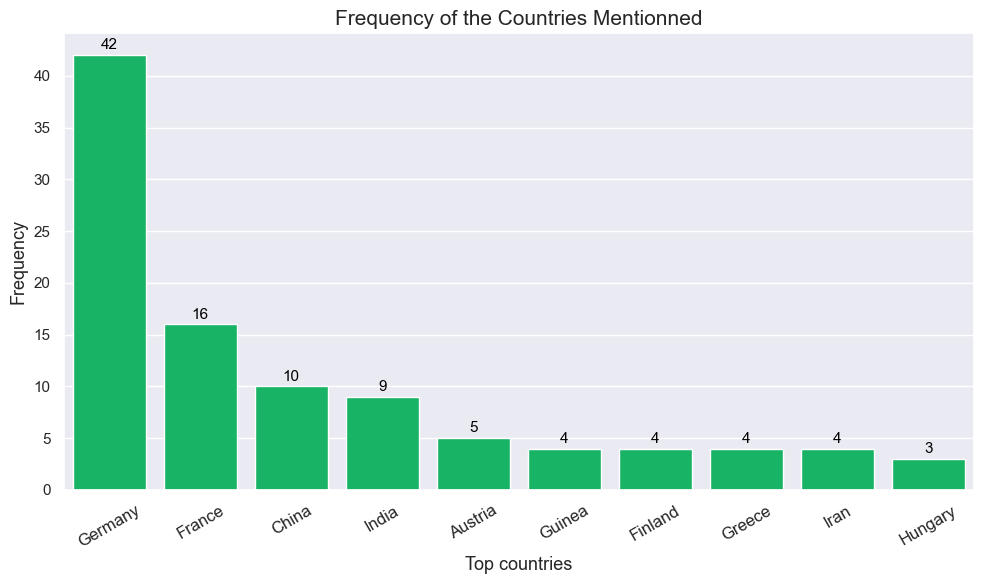

In [200]:
# Frequency Distribution Bar Plot: ADJECTIVES
countries_freq_fig = plt.figure(figsize = (10, 6))
# Generate the bar plot
fig8 = sns.barplot(data = df_country_mentions.head(10), x = 'Country', y = 'Times mentioned', color = '#00CC66')

# Formatting for title and axes
plt.title('Frequency of the Countries Mentionned', fontsize = 15)
plt.xticks(rotation = 30, fontsize=12)
plt.xlabel('Top countries', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

# Add labels to the bars
for container in fig8.containers:
    fig8.bar_label(container, fontsize = 11, padding =2, color = 'black')

# Show the plot
plt.tight_layout()  
plt.savefig(r'C:\Users\hp\20th-century\Visualizations/countriesfreq.png', dpi=300, bbox_inches='tight')
plt.show()

#### Observations: 

The article primarily focuses on Germany and France, both of which are heavily featured due to their involvement in the World Wars. This is reflected in the frequency of mentions, with Germany on the top (42).
Other frequently mentioned countries make sense based on historical significance, but the article reveals a noticeable Western perspective.